### Load data

In [258]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [242]:
customer = pd.read_csv('./olap_data/Customer_Segment_frequency.csv')
customer.head()

,city_id,city,frequency,total_price
0,1,São José dos Campos,0.032932,53.97
1,2,Stuttgart,0.031032,39.60
2,3,Montréal,0.030256,43.58
3,4,Oslo,0.022478,40.61
4,5,Prague,0.032129,42.60


In [243]:
# Check for missing values
print(customer.isnull().sum())

city_id        0
city           0
frequency      0
total_price    0
dtype: int64


In [244]:
customer['city'].value_counts()

Prague                 2
Berlin                 2
Paris                  2
São Paulo              2
London                 2
Mountain View          2
São José dos Campos    1
Dublin                 1
Lisbon                 1
Porto                  1
Frankfurt              1
Lyon                   1
Bordeaux               1
Dijon                  1
Helsinki               1
Budapest               1
Amsterdam              1
Rome                   1
Winnipeg               1
Warsaw                 1
Madrid                 1
Stockholm              1
Edinburgh              1
Sidney                 1
Buenos Aires           1
Santiago               1
Delhi                  1
Yellowknife            1
Ottawa                 1
Halifax                1
Stuttgart              1
Montréal               1
Oslo                   1
Vienne                 1
Brussels               1
Copenhagen             1
Rio de Janeiro         1
Brasília               1
Edmonton               1
Vancouver              1


### Choose columns

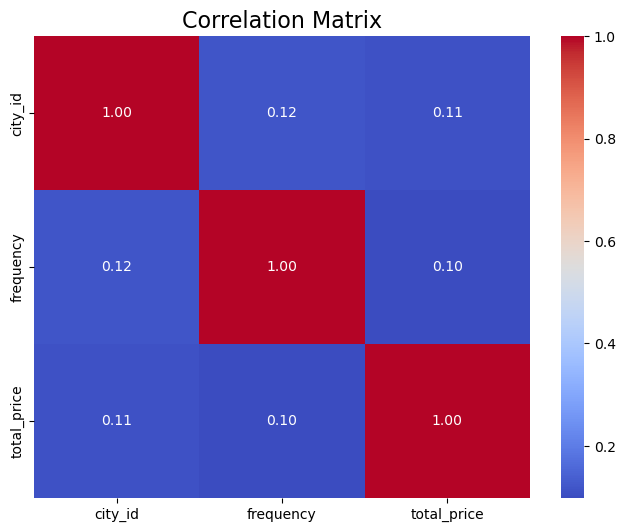

In [261]:
# Select only the numerical columns for correlation (excluding 'Cluster')
numerical_columns = ['city_id','frequency', 'total_price']
correlation_matrix = customer[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [245]:
X = customer.iloc[:,[2,3]].values
X.shape

(59, 2)

In [246]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(customer[['frequency','total_price']])

### Elbow Method to find best cluster's number

In [247]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

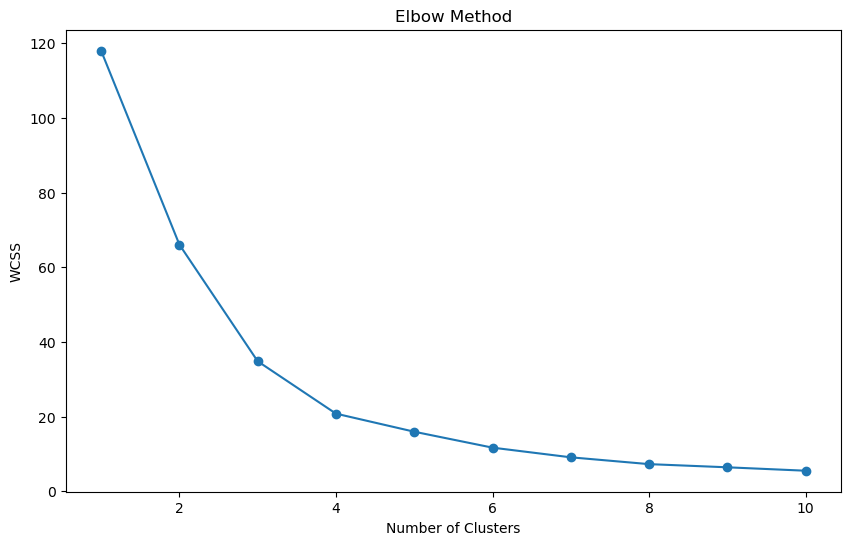

In [248]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Fit the K-Means model


In [249]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer['Cluster'] = kmeans.fit_predict(df_scaled)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [250]:
cluster_analysis = customer.groupby('Cluster').mean()
print(cluster_analysis)

           city_id  frequency  total_price
Cluster                                   
0        27.904762   0.024105    42.586190
1        29.642857   0.030568    40.496786
2        35.400000   0.031488    52.263000


C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\3526073188.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = customer.groupby('Cluster').mean()


In [251]:
# Exclude city_id from the analysis
cluster_analysis = customer.groupby('Cluster')[['frequency', 'total_price']].mean()
print(cluster_analysis)

         frequency  total_price
Cluster                        
0         0.024105    42.586190
1         0.030568    40.496786
2         0.031488    52.263000


### Visualize Cluster

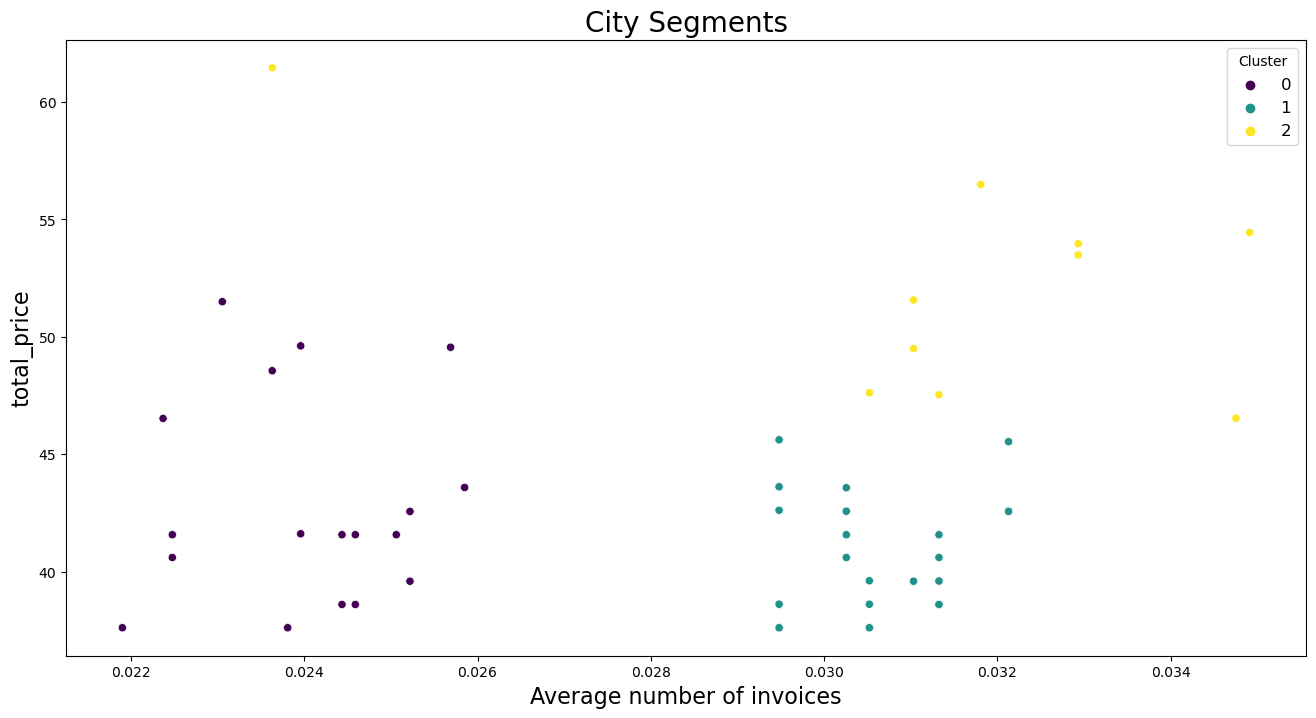

In [259]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=customer['frequency'], y=customer['total_price'], hue=customer['Cluster'], palette='viridis')

plt.title('City Segments', fontsize=20)
plt.xlabel('Average number of invoices', fontsize=16)
plt.ylabel('total_price', fontsize=16)
plt.legend(title='Cluster', fontsize=12)
plt.show()

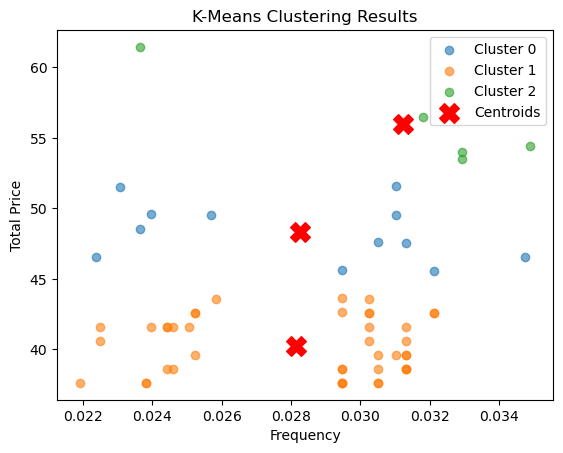

In [257]:
for cluster in range(optimal_clusters):
    plt.scatter(X[Y == cluster, 0], X[Y == cluster, 1], label=f'Cluster {cluster}', alpha=0.6)

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Frequency')
plt.ylabel('Total Price')
plt.legend()
# plt.grid()
plt.show()
